In [1]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [2]:
# reading the Treebank tagged sentences
wsj = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [3]:
# first few tagged sentences
print(wsj[:40])

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], [('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('

In [4]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(wsj,test_size=0.05)

print(len(train_set))
print(len(test_set))
print(train_set[:40])

3718
196
[[('The', 'DET'), ('event', 'NOUN'), ('continues', 'VERB'), ('into', 'ADP'), ('next', 'ADJ'), ('year', 'NOUN'), ('and', 'CONJ'), ('includes', 'VERB'), ('an', 'DET'), ('exchange', 'NOUN'), ('program', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('swap', 'VERB'), ('design', 'NOUN'), ('teachers', 'NOUN'), ('at', 'ADP'), ('Carnegie-Mellon', 'NOUN'), ('and', 'CONJ'), ('Leningrad', 'NOUN'), ("'s", 'PRT'), ('Mutchin', 'NOUN'), ('Institute', 'NOUN'), ('.', '.')], [('But', 'CONJ'), ('the', 'DET'), ('exact', 'ADJ'), ('amount', 'NOUN'), ('of', 'ADP'), ('Reliance', 'NOUN'), ("'s", 'PRT'), ('current', 'ADJ'), ('holding', 'NOUN'), ('has', 'VERB'), ("n't", 'ADV'), ('been', 'VERB'), ('formally', 'ADV'), ('disclosed', 'VERB'), ('*-1', 'X'), ('.', '.')], [('During', 'ADP'), ('Mr.', 'NOUN'), ('McGovern', 'NOUN'), ("'s", 'PRT'), ('nine-year', 'ADJ'), ('term', 'NOUN'), ('as', 'ADP'), ('president', 'NOUN'), (',', '.'), ('the', 'DET'), ('company', 'NOUN'), ("'s", 'PRT'), ('sales', 'NOUN'), ('rose', 'VERB'),

In [5]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

95836

In [6]:
# tokens 
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['The',
 'event',
 'continues',
 'into',
 'next',
 'year',
 'and',
 'includes',
 'an',
 'exchange']

In [7]:
# vocabulary
V = set(tokens)
print(len(V))

12066


In [8]:
# number of tags
T = set([pair[1] for pair in train_tagged_words])
len(T)

12

In [9]:
print(T)

{'ADV', 'NUM', '.', 'ADJ', 'X', 'PRT', 'VERB', 'ADP', 'DET', 'PRON', 'NOUN', 'CONJ'}


In [10]:
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [11]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [12]:
# examples

# large
print("\n", "large")
print(word_given_tag('large', 'ADJ'))
print(word_given_tag('large', 'VERB'))
print(word_given_tag('large', 'NOUN'), "\n")

# will
print("\n", "will")
print(word_given_tag('will', 'MD'))
print(word_given_tag('will', 'NOUN'))
print(word_given_tag('will', 'VERB'))

# book
print("\n", "book")
print(word_given_tag('book', 'NOUN'))
print(word_given_tag('book', 'VERB'))


 large
(27, 6082)
(0, 12911)
(0, 27439) 


 will
(0, 0)
(1, 27439)
(262, 12911)

 book
(5, 27439)
(1, 12911)


In [13]:
word_given_tag('Twitter','NOUN')

(0, 27439)

In [14]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [15]:
# examples
print(t2_given_t1(t2='NOUN', t1='ADJ'))
print(t2_given_t1('ADJ', 'NOUN'))
print(t2_given_t1('NOUN', 'DET'))
print(t2_given_t1('NOUN', 'VERB'))
print(t2_given_t1(',', 'NOUN'))
print(t2_given_t1('PRT', 'PRT'))
print(t2_given_t1('VERB', 'NOUN'))

(4260, 6082)
(330, 27439)
(5302, 8318)
(1422, 12911)
(0, 27439)
(6, 3053)
(4027, 27439)


In [16]:
#Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('DET', '.'))
print(t2_given_t1('VERB', '.'))
print(t2_given_t1('NOUN', '.'))
print(t2_given_t1('NOUN', '.'))

(1939, 11183)
(990, 11183)
(2471, 11183)
(2471, 11183)


In [17]:
t2_given_t1('VERB','DET')

(332, 8318)

In [18]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [19]:
tags_matrix

array([[7.63587877e-02, 3.13437805e-02, 1.35378465e-01, 1.32377461e-01,
        2.26742253e-02, 1.36712240e-02, 3.47115695e-01, 1.17039010e-01,
        6.96898997e-02, 1.56718902e-02, 3.20106708e-02, 6.66888943e-03],
       [2.95945536e-03, 1.84670016e-01, 1.18378222e-01, 3.40337381e-02,
        2.11305127e-01, 2.60432083e-02, 1.83486231e-02, 3.52175198e-02,
        3.25540104e-03, 1.18378224e-03, 3.50695461e-01, 1.39094405e-02],
       [5.17750159e-02, 8.06581452e-02, 9.55021009e-02, 4.41741943e-02,
        2.70052757e-02, 2.50380044e-03, 8.85272324e-02, 9.14781392e-02,
        1.73388183e-01, 6.57247603e-02, 2.20960394e-01, 5.82133606e-02],
       [4.76816855e-03, 2.08812896e-02, 6.47813231e-02, 6.67543560e-02,
        2.12101284e-02, 1.03584351e-02, 1.16737913e-02, 7.72772133e-02,
        4.76816855e-03, 6.57678407e-04, 7.00427473e-01, 1.64419599e-02],
       [2.48732567e-02, 2.85171112e-03, 1.63022816e-01, 1.64765529e-02,
        7.50950575e-02, 1.85519651e-01, 2.04372630e-01, 1.44

In [20]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
tags_df

,ADV,NUM,.,ADJ,X,PRT,VERB,ADP,DET,PRON,NOUN,CONJ
ADV,0.076359,0.031344,0.135378,0.132377,0.022674,0.013671,0.347116,0.117039,0.069690,0.015672,0.032011,0.006669
NUM,0.002959,0.184670,0.118378,0.034034,0.211305,0.026043,0.018349,0.035218,0.003255,0.001184,0.350695,0.013909
.,0.051775,0.080658,0.095502,0.044174,0.027005,0.002504,0.088527,0.091478,0.173388,0.065725,0.220960,0.058213
ADJ,0.004768,0.020881,0.064781,0.066754,0.021210,0.010358,0.011674,0.077277,0.004768,0.000658,0.700427,0.016442
X,0.024873,0.002852,0.163023,0.016477,0.075095,0.185520,0.204373,0.144645,0.054499,0.055767,0.062579,0.010298
PRT,0.010154,0.056010,0.041926,0.083524,0.012447,0.001965,0.407141,0.018670,0.099902,0.017688,0.248280,0.002293
VERB,0.081481,0.023159,0.035629,0.065835,0.218031,0.030672,0.167996,0.091782,0.134382,0.035551,0.110139,0.005344
ADP,0.014156,0.063438,0.040234,0.105907,0.034274,0.001490,0.008196,0.016711,0.324534,0.069292,0.320915,0.000852
DET,0.013104,0.022241,0.017673,0.204376,0.045804,0.000240,0.039913,0.009618,0.005530,0.003607,0.637413,0.000481
PRON,0.033639,0.007645,0.040138,0.071483,0.094037,0.012615,0.485474,0.023318,0.009557,0.007263,0.209480,0.005352


In [21]:
tags_df.loc['.', :]

ADV     0.051775
NUM     0.080658
.       0.095502
ADJ     0.044174
X       0.027005
PRT     0.002504
VERB    0.088527
ADP     0.091478
DET     0.173388
PRON    0.065725
NOUN    0.220960
CONJ    0.058213
Name: ., dtype: float32

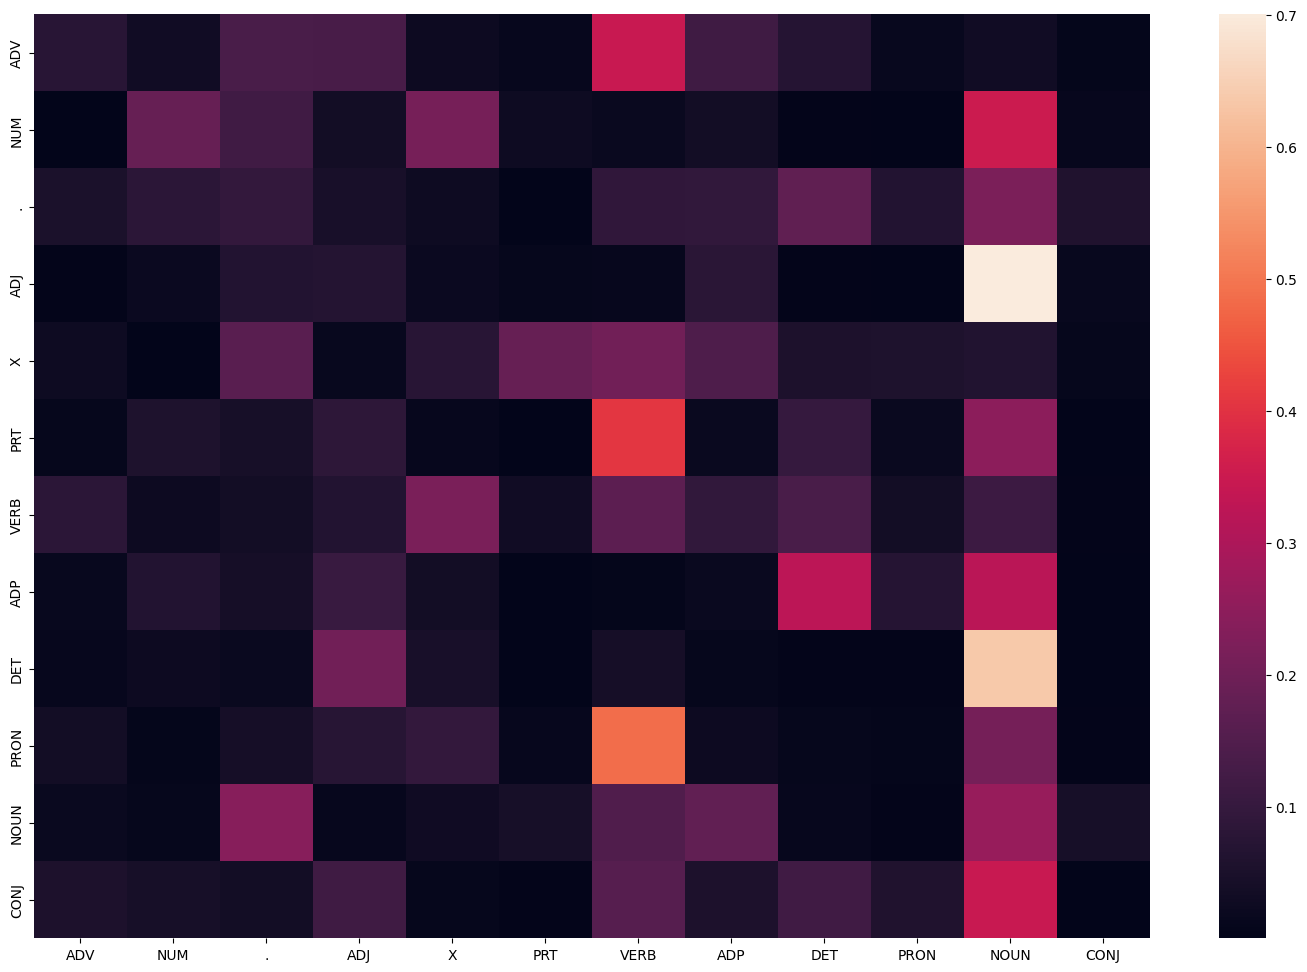

In [22]:
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

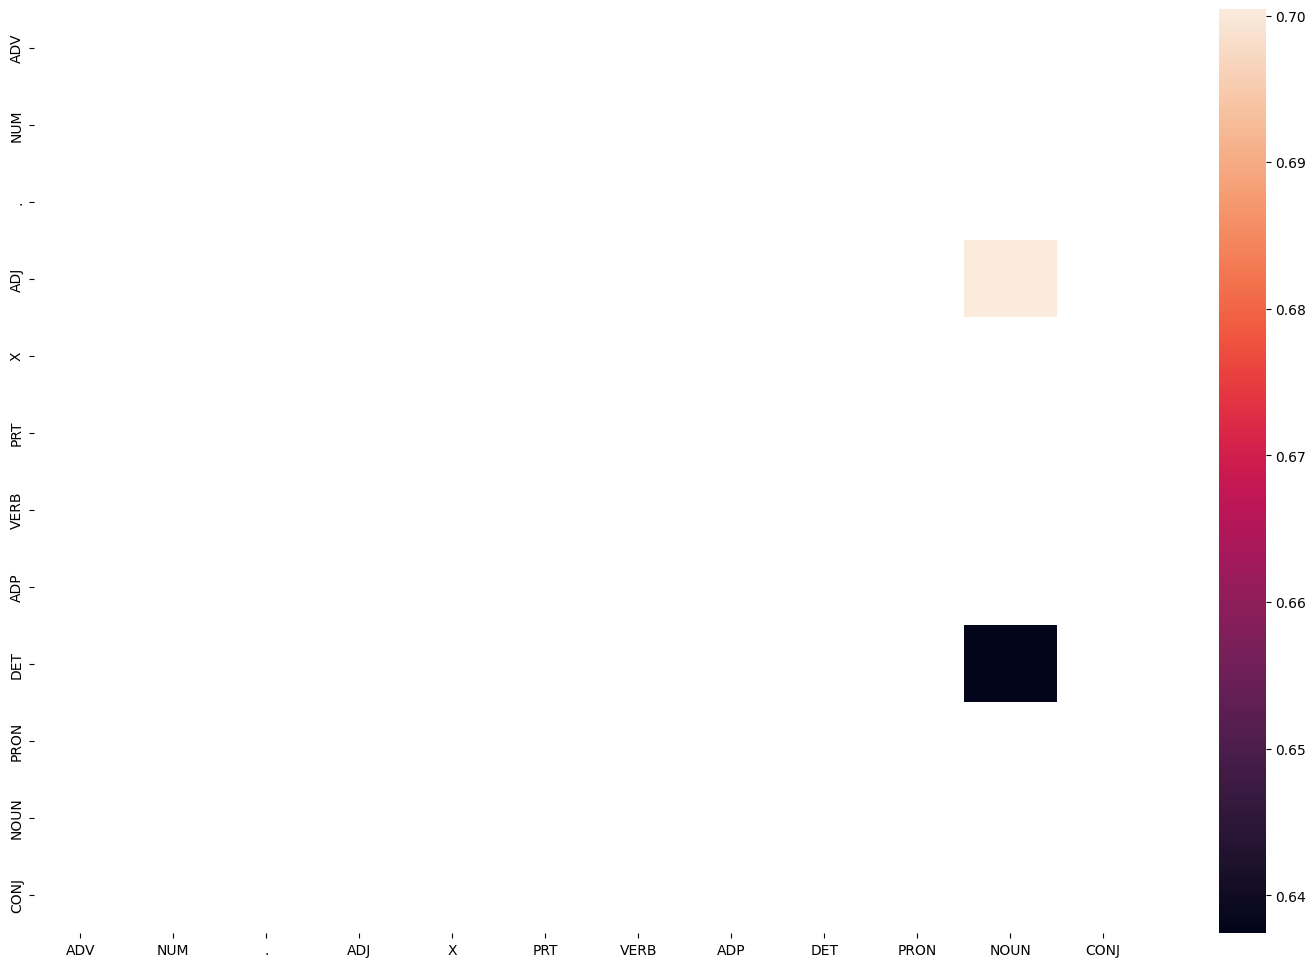

In [23]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

In [24]:
# Viterbi Heuristic
def Viterbi_vanilla(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))


In [25]:
def Viterbi_smoothed(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = 0.000001+word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]+0.000001*len(T)
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [26]:
def find_state(word):
    #punc=['"',"'",',','.','(',')','?','[',']',':',';']
    xc=['*']
    if re.search(r'.*(ing|ed|es|ould)$',word.lower()):
        return 'VERB'
    elif re.search(r'to$',str(word).lower()):
        return 'PRT'
    elif re.search(r'^-?[0-9]+(.[0-9]+)?\.*$',str(word).lower()):
        return 'NUM'
    elif '*' in word:
        return 'X'
    elif re.search(r'.*\'s$',word.lower()):
        return 'NOUN'
    elif re.search(r'.*ness$',word.lower()):
        return 'NOUN'
    elif re.search(r'(The|the|A|a|An|an)$',word):
        return 'ADP'
    elif re.search(r'.*able$',word.lower()):
        return 'ADJ'
    elif re.search(r'.*ly$',word.lower()):
        return 'ADV'
    elif re.search(r'(He|he|She|she|It|it|I|me|Me|You|you|His|his|Her|her|Its|its|my|Your|your|Yours|yours)$',word):
        return 'PRON'
    elif re.search(r'(on|On|at|At|since|Since|For|for|Ago|ago|before|Before|till|Till|until|Until|by|By|Beside|beside|under|Under|below|Below|over|Over|above|Above|across|Across|Through|through|Into|into|towards|Towards|onto|Onto|from|From)$',word):
        return 'ADP'
    elif re.search(r'',word):
        return 'NOUN'
    elif re.search(r'(\'|\"|\.|\(|\)|\?|\[|\]|\:|\;)+',word):
        return '.'
    else:        
        return 'NOUN'
    

    
def Viterbi_manual(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        if pmax==0.0:
            state_word=find_state(word)
            state.append(state_word)
            #print(word,':',state_word)
        else:
        # getting state for which probability is maximum
            state_max = T[p.index(pmax)] 
            state.append(state_max)
    return list(zip(words, state))

In [27]:
def Viterbi_common(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            if word in tokens: 
                emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            else:
                emission_p=1
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        if pmax==0.0:
            state_word='NOUN'
            state.append(state_word)
            #print(word,':',state_word)
        else:
        # getting state for which probability is maximum
            state_max = T[p.index(pmax)] 
            state.append(state_max)
    return list(zip(words, state))


In [28]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            if word in tokens: 
                emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            else:
                emission_p=1
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [29]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

#random.seed(1234)

# choose random 5 sents
#rndom = [random.randint(1,len(test_set)) for x in range(10)]

# list of sents
#test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_set for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_set for tup in sent]
test_run_base

[('Exports', 'NOUN'),
 ('in', 'ADP'),
 ('October', 'NOUN'),
 ('stood', 'VERB'),
 ('at', 'ADP'),
 ('$', '.'),
 ('5.29', 'NUM'),
 ('billion', 'NUM'),
 ('*U*', 'X'),
 (',', '.'),
 ('a', 'DET'),
 ('mere', 'ADJ'),
 ('0.7', 'NUM'),
 ('%', 'NOUN'),
 ('increase', 'NOUN'),
 ('from', 'ADP'),
 ('a', 'DET'),
 ('year', 'NOUN'),
 ('earlier', 'ADJ'),
 (',', '.'),
 ('while', 'ADP'),
 ('imports', 'NOUN'),
 ('increased', 'VERB'),
 ('sharply', 'ADV'),
 ('to', 'PRT'),
 ('$', '.'),
 ('5.39', 'NUM'),
 ('billion', 'NUM'),
 ('*U*', 'X'),
 (',', '.'),
 ('up', 'ADV'),
 ('20', 'NUM'),
 ('%', 'NOUN'),
 ('from', 'ADP'),
 ('last', 'ADJ'),
 ('October', 'NOUN'),
 ('.', '.'),
 ('Department', 'NOUN'),
 ('officials', 'NOUN'),
 ('say', 'VERB'),
 ('that', 'ADP'),
 ('HHS', 'NOUN'),
 ('Secretary', 'NOUN'),
 ('Louis', 'NOUN'),
 ('Sullivan', 'NOUN'),
 ('will', 'VERB'),
 ('support', 'VERB'),
 ('Dr.', 'NOUN'),
 ('Mason', 'NOUN'),
 ("'s", 'PRT'),
 ('ruling', 'NOUN'),
 (',', '.'),
 ('which', 'DET'),
 ('*T*-112', 'X'),
 ('will', '

In [30]:
# tagging the test sentences
start = time.time()
tagged_seq_vanilla = Viterbi_vanilla(test_tagged_words)
check = [i for i, j in zip(tagged_seq_vanilla, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq_vanilla)
end = time.time()
print('Time Taken:',end-start)
print('Accuracy is :',accuracy)

Time Taken: 380.41922640800476
Accuracy is : 0.9020661157024793


In [31]:
print('Vanilla Viterbi-Incorrect tagged cases are:')
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_vanilla, test_run_base)) if j[0]!=j[1]]
[i[1]for i in incorrect_tagged_cases]

Vanilla Viterbi-Incorrect tagged cases are:


[(('Exports', 'ADV'), ('Exports', 'NOUN')),
 (('5.29', 'ADV'), ('5.29', 'NUM')),
 (('0.7', 'ADV'), ('0.7', 'NUM')),
 (('earlier', 'ADV'), ('earlier', 'ADJ')),
 (('5.39', 'ADV'), ('5.39', 'NUM')),
 (('*T*-112', 'ADV'), ('*T*-112', 'X')),
 (('acting', 'ADV'), ('acting', 'ADJ')),
 (('reds', 'ADV'), ('reds', 'NOUN')),
 (('Rhone', 'ADV'), ('Rhone', 'NOUN')),
 (('as', 'ADP'), ('as', 'ADV')),
 (('225,000', 'ADV'), ('225,000', 'NUM')),
 (('much', 'ADV'), ('much', 'ADJ')),
 (('60.36', 'ADV'), ('60.36', 'NUM')),
 (('*T*-181', 'ADV'), ('*T*-181', 'X')),
 (('rule', 'VERB'), ('rule', 'NOUN')),
 (('solicitation', 'ADV'), ('solicitation', 'NOUN')),
 (('replacing', 'ADV'), ('replacing', 'VERB')),
 (('chief', 'NOUN'), ('chief', 'ADJ')),
 (('resigned', 'VERB'), ('resigned', 'ADJ')),
 (('in', 'ADP'), ('in', 'ADV')),
 (('automotive-parts', 'ADV'), ('automotive-parts', 'ADJ')),
 (('around', 'ADP'), ('around', 'ADV')),
 (('muted', 'ADV'), ('muted', 'VERB')),
 (('observance', 'ADV'), ('observance', 'NOUN')),

In [32]:
# tagging the test sentences
start = time.time()
tagged_seq_smooth = Viterbi_smoothed(test_tagged_words)
check = [i for i, j in zip(tagged_seq_smooth, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq_smooth)
end = time.time()
print('Time Taken:',end-start)
print('Accuracy is :',accuracy)

Time Taken: 383.7571897506714
Accuracy is : 0.9351239669421487


In [33]:
print('Laplace smoothed Viterbi-Incorrect tagged cases are:')
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_smooth, test_run_base)) if j[0]!=j[1]]
[i[1]for i in incorrect_tagged_cases]

Laplace smoothed Viterbi-Incorrect tagged cases are:


[(('5.29', 'NOUN'), ('5.29', 'NUM')),
 (('0.7', 'NOUN'), ('0.7', 'NUM')),
 (('earlier', 'ADV'), ('earlier', 'ADJ')),
 (('5.39', 'NOUN'), ('5.39', 'NUM')),
 (('*T*-112', 'NOUN'), ('*T*-112', 'X')),
 (('acting', 'NOUN'), ('acting', 'ADJ')),
 (('as', 'ADP'), ('as', 'ADV')),
 (('225,000', 'NOUN'), ('225,000', 'NUM')),
 (('much', 'ADV'), ('much', 'ADJ')),
 (('60.36', 'DET'), ('60.36', 'NUM')),
 (('rule', 'VERB'), ('rule', 'NOUN')),
 (('chief', 'NOUN'), ('chief', 'ADJ')),
 (('resigned', 'VERB'), ('resigned', 'ADJ')),
 (('in', 'ADP'), ('in', 'ADV')),
 (('automotive-parts', 'NOUN'), ('automotive-parts', 'ADJ')),
 (('around', 'ADP'), ('around', 'ADV')),
 (('efficient', 'NOUN'), ('efficient', 'ADJ')),
 (('muted', 'X'), ('muted', 'VERB')),
 (('All', 'DET'), ('All', 'NOUN')),
 (('Day', 'VERB'), ('Day', 'NOUN')),
 (('Lauderhill', 'DET'), ('Lauderhill', 'NOUN')),
 (('Plantation', 'DET'), ('Plantation', 'NOUN')),
 (('routine', 'NOUN'), ('routine', 'ADJ')),
 (('operating', 'VERB'), ('operating', 'NOUN

In [34]:
start = time.time()
tagged_seq_sm = Viterbi_manual(test_tagged_words)
check = [i for i, j in zip(tagged_seq_sm, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq_sm)
end = time.time()
print('Time Taken:',end-start)
print('Accuracy is :',accuracy)

Time Taken: 380.1131365299225
Accuracy is : 0.9514462809917356


In [35]:
print('Laplace smoothed Viterbi-Incorrect tagged cases are:')
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_sm, test_run_base)) if j[0]!=j[1]]
[i[1]for i in incorrect_tagged_cases]

Laplace smoothed Viterbi-Incorrect tagged cases are:


[(('earlier', 'ADV'), ('earlier', 'ADJ')),
 (('acting', 'VERB'), ('acting', 'ADJ')),
 (('as', 'ADP'), ('as', 'ADV')),
 (('much', 'ADV'), ('much', 'ADJ')),
 (('rule', 'VERB'), ('rule', 'NOUN')),
 (('solicitation', 'ADP'), ('solicitation', 'NOUN')),
 (('chief', 'NOUN'), ('chief', 'ADJ')),
 (('resigned', 'VERB'), ('resigned', 'ADJ')),
 (('in', 'ADP'), ('in', 'ADV')),
 (('automotive-parts', 'NOUN'), ('automotive-parts', 'ADJ')),
 (('around', 'ADP'), ('around', 'ADV')),
 (('All', 'DET'), ('All', 'NOUN')),
 (('Plantation', 'ADP'), ('Plantation', 'NOUN')),
 (('routine', 'NOUN'), ('routine', 'ADJ')),
 (('inspection', 'ADP'), ('inspection', 'NOUN')),
 (('operating', 'VERB'), ('operating', 'NOUN')),
 (('Marathon', 'ADP'), ('Marathon', 'NOUN')),
 (('that', 'ADP'), ('that', 'DET')),
 (('tailor-made', 'NOUN'), ('tailor-made', 'ADJ')),
 (('change-ringing', 'VERB'), ('change-ringing', 'NOUN')),
 (('peculiar', 'NOUN'), ('peculiar', 'ADJ')),
 (('English', 'NOUN'), ('English', 'ADJ')),
 (('peculiarities

In [36]:
start = time.time()
tagged_seq_co = Viterbi_common(test_tagged_words)
check = [i for i, j in zip(tagged_seq_co, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq_co)
end = time.time()
print('Time Taken:',end-start)
print('Accuracy is :',accuracy)

Time Taken: 348.07811641693115
Accuracy is : 0.9369834710743802


In [37]:
print('Laplace smoothed Viterbi-Incorrect tagged cases are:')
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_co, test_run_base)) if j[0]!=j[1]]
[i[1]for i in incorrect_tagged_cases]

Laplace smoothed Viterbi-Incorrect tagged cases are:


[(('5.29', 'NOUN'), ('5.29', 'NUM')),
 (('0.7', 'NOUN'), ('0.7', 'NUM')),
 (('earlier', 'ADV'), ('earlier', 'ADJ')),
 (('5.39', 'NOUN'), ('5.39', 'NUM')),
 (('*T*-112', 'NOUN'), ('*T*-112', 'X')),
 (('acting', 'NOUN'), ('acting', 'ADJ')),
 (('as', 'ADP'), ('as', 'ADV')),
 (('225,000', 'NOUN'), ('225,000', 'NUM')),
 (('much', 'ADV'), ('much', 'ADJ')),
 (('60.36', 'DET'), ('60.36', 'NUM')),
 (('rule', 'VERB'), ('rule', 'NOUN')),
 (('chief', 'NOUN'), ('chief', 'ADJ')),
 (('resigned', 'VERB'), ('resigned', 'ADJ')),
 (('in', 'ADP'), ('in', 'ADV')),
 (('automotive-parts', 'NOUN'), ('automotive-parts', 'ADJ')),
 (('around', 'ADP'), ('around', 'ADV')),
 (('muted', 'X'), ('muted', 'VERB')),
 (('All', 'DET'), ('All', 'NOUN')),
 (('Day', 'VERB'), ('Day', 'NOUN')),
 (('Lauderhill', 'DET'), ('Lauderhill', 'NOUN')),
 (('Plantation', 'DET'), ('Plantation', 'NOUN')),
 (('routine', 'NOUN'), ('routine', 'ADJ')),
 (('operating', 'VERB'), ('operating', 'NOUN')),
 (('198', 'NOUN'), ('198', 'NUM')),
 (('tha